## Práctica 2. Espacios de Color. Histograma


### Convertiendo imágenes entre diferentes espacios de color

OpenCV implementa diferentes modelos de color. Algunos modelos de color son normalmente usados por dispositivos de entrada tales como cámaras, mientras que otros modelos son usados en dispositivos de salida como televisiones, displays o impresoras. 
Normalmente cuando trabajamos con técnicas de visión por computador a imágenes, lo común es trabajar con tres tipos de modelos de color: niveles de gris, BGR o RGB y hue-saturation-value (HSV).



#### Hue Saturation Value HSV 

El modelo HSV se caracteriza por tener tres componentes:
* Color (Hue H): El rango permitido es de 0 a 179 
* Saturación (S): que describe la pureza del color. Con rango en [0-255]
* Brillo (V): Intensidad del color 0 es mas oscuro y 1 es más claro. Con rango en [0-255]
<table>
    <tr><td> <img src="Triangulo_HSV.png"></td><td><img src="hsv.webP"></td></tr>
</table>    

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('roco.png')
imgaux= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Covertimos a HSV
imghsv= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#mostramos la información del color, saturacion y brillo
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(imgaux)
plt.title("Original")

plt.subplot(2,2,2)
plt.imshow(imghsv[:,:,0],"gray")
plt.title("Color")

plt.subplot(2,2,3)
plt.imshow(imghsv[:,:,1],"gray")
plt.title("Saturación")


plt.subplot(2,2,4)
plt.imshow(imghsv[:,:,2],"gray")
plt.title("Brillo")


Vamos a obtener los valores de los colores básicos (rojo, verde y azul) en hsv.

In [ ]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print("Verde: ",hsv_green)

blue = np.uint8([[[255,0,0 ]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print("Azul:", hsv_blue)

red = np.uint8([[[0,0,255 ]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
print("Rojo:", hsv_red)


Para entender mejor el sistema HSV vamos a crear una imagen artificial toda con valores de rojo. La vamos a pasar a HSV para ver como se representa el rojo. A continuación vamos a variar la saturación.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

rojo=np.ones((200, 200,3),dtype='uint8')*255
rojo[:,:,0]=0
rojo[:,:,1]=0
size=rojo.shape[:2]
rojohsv=cv2.cvtColor(rojo, cv2.COLOR_BGR2HSV)
print("Rojo: ",rojohsv[0,0,:])
fps=10

video =cv2.VideoWriter('rojos.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
aux = rojohsv;

img_array = []

for i in range(0,256):
    aux[:,:,1]=i
    #volvemos a rgb
    frame =cv2.cvtColor(aux,cv2.COLOR_HSV2BGR)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release();


### Ciclamos el color en una imagen.
Vamos a crear un video en la que vamos a ciclar los colores de una imagen

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img=cv2.imread('pez1.jpg')
height, width, channels = img.shape
pezhsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

fps=10
videoCapture = cv2.VideoCapture(0)
size = (int(videoCapture.get( cv2.CAP_PROP_FRAME_WIDTH)), int(videoCapture.get( cv2.CAP_PROP_FRAME_HEIGHT)))
video =cv2.VideoWriter('pez_color.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
aux = pezhsv;

img_array = []

for i in range(0,180):
    aux[:,:,0]=((aux[:,:,0]+1)%180)
    
    #volvemos a rgb
    frame =cv2.cvtColor(aux,cv2.COLOR_HSV2BGR)
    frame = cv2.resize(frame, size, interpolation = cv2.INTER_AREA)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release();

### SEGMENTAR POR COLOR
El objetivo es seleccionar los pixeles que tienen un determinado color.  En el siguiente ejemplo vamos obtener una máscara que nos indique donde se encuentra la información que contenga un determinado color. 

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img=cv2.imread('pez3.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
#Buscamos los valores que contengan rojos
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_rojo = np.array([0,128,50])
upper_rojo = np.array([30,255,255])
# Obtenemos una mascara con los valores de rojos
mask = cv2.inRange(img_hsv, lower_rojo, upper_rojo)
lower_rojo = np.array([150,128,50])
upper_rojo = np.array([179,255,255])
mask2 = cv2.inRange(img_hsv, lower_rojo, upper_rojo)
mask=cv2.bitwise_or(mask,mask2)
# Hacemos una operacion AND entre la imagen original y mascara
res = cv2.bitwise_and(img,img, mask= mask)
cv2.imshow('Original',img)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
while (1):
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()


### Otros Modelos de Color
Existe otros espacios de color que depende del objetivo que queramos obtener puede ser interesantes usarlos.
#### Modelo YCrCb
Se utiliza para representar el color en aplicaciones sobre todo de compresión. Representa la lumninancia Y y dos bandas cromáticas. Los sistemas de compresión  reducen las bandas Cr y Cb a la mitad de la resolución de la imagen original. Se suele usar en sistemas de compresión mpeg y jpeg. 

In [ ]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('pez3.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgYCrCb=cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Original")
plt.subplot(2,3,2)
plt.imshow(imgYCrCb)
plt.title("YCrCb")
plt.subplot(2,3,3)
plt.imshow(imgYCrCb[:,:,0],"gray")
plt.title("Luminancia")
plt.subplot(2,3,4)
plt.imshow(imgYCrCb[:,:,1],"gray")
plt.title("Cr")
plt.subplot(2,3,5)
plt.imshow(imgYCrCb[:,:,2],"gray")
plt.title("Cb")





#### Modelo Lab
Las siglas LAB se refieren al espacio de color tridimensional, en donde L  es luminosidad de negro a blanco, a va de rojo **a** verde y  **b** va de azul a amarillo. Actualmente se usa en Adobe Photoshop, archivos TIFF y documentos PDF.

In [ ]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('pez2.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgLab=cv2.cvtColor(img,cv2.COLOR_RGB2Lab)
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Original")
plt.subplot(2,3,2)
plt.imshow(imgLab)
plt.title("Lab")
plt.subplot(2,3,3)
plt.imshow(imgLab[:,:,0],"gray")
plt.title("Luminancia")
plt.subplot(2,3,4)
plt.imshow(imgLab[:,:,1],"gray")
plt.title("a")
plt.subplot(2,3,5)
plt.imshow(imgLab[:,:,2],"gray")
plt.title("b")


### Histograma
El histograma es un grafo que nos permite visualizar la distribución de intensidad de una imagen. Analizando el histograma de una imagen, se puede obtener una aproximación al contraste, brillo, distribución de la intensidad de la imagen.  En Opencv podemos obtener el histograma usando  ***cv2.calcHist()***
La cabecera de esta función es la siguiente:

 **cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**
* images :  es la imagen sobre la que queremos obtener el histograma. Puede ser de tipo uint8 o float32. Se debe dar encerrada entre corchetes “[img]”.
* channels : Igualmente se indica entre corchetes. Es el índice del canal para el que queremos obtener el histograma. Si la imagen es una imagen de niveles de gris entonces le damos [0]. Pero si es una imagen de color le podemos dar el valor [0],[1] o [2], para obtener el histograma sobre el canal rojo, verde o azul respectivamente.
* mask : es la imagen máscara. Si queremos obtener el histograma sobre la imagen entera le damos el valor "None". Pero si queremos obtener el histograma sobre una región podemos indicarlo con la máscara. 
* histSize : cuantos contadores tendrá nuestro histograma. Si se quiere aplicar sobre una imagen de niveles de gris el numero de contadores será 256 normalmente. Para ello indicaremos [256].
* ranges : Sobre que rango de valores de la imagen de entrada queremos obtener el histograma. Normalemente será [0,256]
* hist: por defecto true. Indica si los bin son uniformes.
* accumulate: por defecto es false. Si es true no inicializa a cero el histograma para obtener el histograma de multiples imagenes.

    


In [ ]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)

plt.figure(figsize=(10,8))
hist= cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.plot(hist)
plt.xlim([0,256])

A continuación se muestra sobre una imagen de color los histogramas del rojo, verde y azul

In [ ]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('pez3.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(13,15))
histrojo= cv2.calcHist([img],[0],None,[256],[0,256])
histverde= cv2.calcHist([img],[1],None,[256],[0,256])
histazul= cv2.calcHist([img],[2],None,[256],[0,256])

plt.subplot(421), plt.imshow(img),plt.title("ORIGINAL")
plt.subplot(423), plt.imshow(img[:,:,0],'gray'),plt.title("Roja")
plt.subplot(424), plt.plot(histrojo)
plt.xlim([0,256])
plt.subplot(425), plt.imshow(img[:,:,1],'gray'),plt.title("Verde")
plt.subplot(426), plt.plot(histverde)
plt.xlim([0,256])
plt.subplot(427), plt.imshow(img[:,:,2],'gray'),plt.title("Azul")
plt.subplot(428), plt.plot(histazul)
plt.xlim([0,256])

Mostramos el histograma del color, saturación y brillo

In [ ]:
from matplotlib import pyplot as plt
import cv2
img=cv2.imread('pez3.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imghsv= cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

plt.figure(figsize=(13,15))
histcolor= cv2.calcHist([img],[0],None,[180],[0,179])
histsaturacion= cv2.calcHist([img],[1],None,[256],[0,256])
histbrillo= cv2.calcHist([img],[2],None,[256],[0,256])

plt.subplot(421), plt.imshow(img),plt.title("ORIGINAL")
plt.subplot(423), plt.imshow(imghsv[:,:,0],'gray'),plt.title("Color")
plt.subplot(424), plt.plot(histcolor)
plt.xlim([0,179])
plt.subplot(425), plt.imshow(img[:,:,1],'gray'),plt.title("Saturacion")
plt.subplot(426), plt.plot(histsaturacion)
plt.xlim([0,256])
plt.subplot(427), plt.imshow(img[:,:,2],'gray'),plt.title("Brillo")
plt.subplot(428), plt.plot(histbrillo)
plt.xlim([0,256])

Ignacio Vellido Expósito

In [1]:
# Función para mostrar varias imágenes en una sola ventana
import numpy as np
from matplotlib import pyplot as plt

def plot_vector_img(vim, cols=0, titles=None, suptitle=None, gray=False):
    """ Visualiza varias imágenes a la vez """
    n_images = len(vim)

    if not cols:
        cols = 7 if len(vim) >= 7 else len(vim)

    if titles is None:
        titles = ['' for i in range(1, n_images+1)]

    if suptitle is None:
          suptitle = ''

    fig = plt.figure()
    for n, (image, title) in enumerate(zip(vim, titles)):
        a = fig.add_subplot(int(np.ceil(n_images/float(cols))), cols, n+1)          
        plt.imshow(image, "gray" if gray else None)        

        a.set_title(title)        
        a.axis('off')    

    fig.suptitle(suptitle)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.subplots_adjust(bottom=0)

    plt.show()

Obtener la representación en hsv de los colores: amarillo, naranja, púrpura,

In [16]:
import cv2

# Amarillo
yellow_rgb = np.ones((1,1,3), dtype='uint8') * 255
yellow_rgb[:,:,2] = 0
yellow_hsv = cv2.cvtColor(yellow_rgb, cv2.COLOR_RGB2HSV)

# Naranja
orange_rgb = np.ones((1,1,3), dtype='uint8') * 255
orange_rgb[:,:,1] = 128
orange_rgb[:,:,2] = 0
orange_hsv = cv2.cvtColor(orange_rgb, cv2.COLOR_RGB2HSV)

# Purple
purple_rgb = np.ones((1,1,3), dtype='uint8') * 128
purple_rgb[:,:,1] = 0
purple_hsv = cv2.cvtColor(purple_rgb, cv2.COLOR_RGB2HSV)


print("Amarillo:\tRGB{}\t-\tHSV{}".format(yellow_rgb[0,0,:], yellow_hsv[0,0,:]))
print("Naranja:\tRGB{}\t-\tHSV{}".format(orange_rgb[0,0,:], orange_hsv[0,0,:]))
print("Púrpura:\tRGB{}\t-\tHSV{}".format(purple_rgb[0,0,:], purple_hsv[0,0,:]))

Amarillo:	RGB[255 255   0]	-	HSV[ 30 255 255]
Naranja:	RGB[255 128   0]	-	HSV[ 15 255 255]
Púrpura:	RGB[128   0 128]	-	HSV[150 255 128]


Crear un video para obtener la gama de grises de una imagen

In [ ]:
# grays = cv2.imread("chica.jpg", cv2.IMREAD_GRAYSCALE)
# size = grays.shape[:2]


# fps=10
# video =cv2.VideoWriter('grises.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)


# img_array = []

# for i in range(0,256):
#     aux[:,:,1]=i
#     frame = cv2.cvtColor(aux, cv2.COLOR_HSV2BGR)
#     img_array.append(frame)

# for i in range(len(img_array)):
#     video.write(img_array[i])
    
# video.release()


Crear un video para obtener para el color verde todos sus valores diferentes en luminosidad.

In [31]:
green = np.zeros((200,200,3), dtype='uint8')
green[:,:,1] = 255

size = green.shape[:2]
green_lab = cv2.cvtColor(green, cv2.COLOR_BGR2LAB)

print("Verde:\tRGB{}\t-\tLAB{}".format(green[0,0,:], green_lab[0,0,:]))

fps=10
video =cv2.VideoWriter('verdes.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

aux = green_lab
img_array = []

for i in range(0,256):
    aux[:,:,0] = i    
    frame = cv2.cvtColor(aux,cv2.COLOR_LAB2BGR)
    img_array.append(frame)

for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release()


Verde:	RGB[  0 255   0]	-	LAB[224  42 211]


Crear un video para obtener para el color azul todos sus valores diferentes en saturación

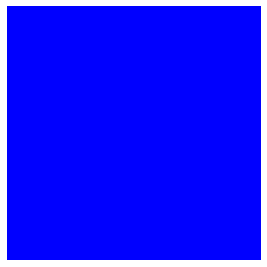

Azul:	RGB[  0   0 255]	-	HSV[120 255 255]


In [32]:
blues = np.zeros((200,200,3), dtype='uint8')
blues[:,:,2] = 255

size = blues.shape[:2]
blues_hsv = cv2.cvtColor(blues, cv2.COLOR_RGB2HSV)

plot_vector_img([blues])

print("Azul:\tRGB{}\t-\tHSV{}".format(blues[0,0,:], blues_hsv[0,0,:]))

fps = 10
video = cv2.VideoWriter('azules.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

aux = blues_hsv
img_array = []

for i in range(0,256):
    aux[:,:,1] = i
    frame = cv2.cvtColor(aux, cv2.COLOR_HSV2BGR)
    img_array.append(frame)

for i in range(len(img_array)):
    video.write(img_array[i])
    
video.release()


Sobre la imagen pez2 segmentar la información naranja

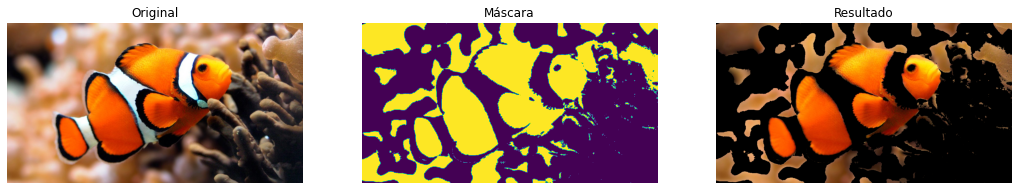

In [35]:
pez2 = cv2.imread("pez2.jpg", cv2.IMREAD_COLOR)
pez2_rgb = cv2.cvtColor(pez2, cv2.COLOR_BGR2RGB)
pez2_hsv = cv2.cvtColor(pez2, cv2.COLOR_BGR2HSV)

# Naranja: HSV(30,255,255)
# Cogemos el rango de +-30º
lower_rojo = np.array([0,128,50])
upper_rojo = np.array([60,255,255])
mask = cv2.inRange(pez2_hsv, lower_rojo, upper_rojo)

# Aplicando la máscara
res = cv2.bitwise_and(pez2, pez2, mask=mask)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

plot_vector_img([pez2_rgb, mask, res], titles=["Original", "Máscara", "Resultado"])

Sobre la imagen pez1 cambiar el azul a naranja

Aplicar chroma_key sobre la imagen praga y la imagen de chica. El objetivo es obtener una nueva imagen que en primer plano este la chica y en segundo plano praga. Permitir colocar la imagen de la chica en cualquier punto de la imagen de praga.

Crear una función que dada una imagen de color obtenga el histograma del canal rojo, verde y azul pero de una región de interés.